# **Capstone**: Sprint 2

### *William Reggler – BrainStation Data Science student (November 2024)*

## *Preparation*

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
# Read in the data
df_2015 = pd.read_csv('data/Boston Marathon Results/marathon_results_2015.csv')
df_2016 = pd.read_csv('data/Boston Marathon Results/marathon_results_2016.csv')
df_2017 = pd.read_csv('data/Boston Marathon Results/marathon_results_2017.csv')

In [3]:
# Peek at each year's dataset
df_2015.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [4]:
df_2016.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5


In [5]:
df_2017.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


This peek shows that, with the exception of a few 'unnamed' columns, the structures of the three datasets match. Let's go ahead and combine them (after ensuring that the year is add to the columns).

In [6]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017

df = pd.concat([df_2015, df_2016, df_2017], ignore_index=True)
df.head()


,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,2015,NaN
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,2015,NaN
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,2015,NaN
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,2015,NaN
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,2015,NaN


## *Data Preprocessing*

Now let's get a sense of the dataframe so we know what to clean and/or remove.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79638 entries, 0 to 79637
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     53008 non-null  float64
 1   Bib            79638 non-null  object 
 2   Name           79638 non-null  object 
 3   Age            79638 non-null  int64  
 4   M/F            79638 non-null  object 
 5   City           79637 non-null  object 
 6   State          70645 non-null  object 
 7   Country        79638 non-null  object 
 8   Citizen        3440 non-null   object 
 9   Unnamed: 9     158 non-null    object 
 10  5K             79638 non-null  object 
 11  10K            79638 non-null  object 
 12  15K            79638 non-null  object 
 13  20K            79638 non-null  object 
 14  Half           79638 non-null  object 
 15  25K            79638 non-null  object 
 16  30K            79638 non-null  object 
 17  35K            79638 non-null  object 
 18  40K   

In [8]:
# Check for null values
df.isna().sum()

Unnamed: 0       26630
Bib                  0
Name                 0
Age                  0
M/F                  0
City                 1
State             8993
Country              0
Citizen          76198
Unnamed: 9       79480
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
Year                 0
Unnamed: 8       79555
dtype: int64

In [9]:
df['Proj Time'].value_counts().sort_index()

Proj Time
-           53117
10:42:16        1
2:12:45         1
2:13:32         1
2:14:02         1
            ...  
6:58:53         1
7:22:23         1
7:47:56         2
8:23:27         1
8:25:09         1
Name: count, Length: 8891, dtype: int64

The `Proj Time` column mostly contains nothing, so we'll drop that too. Also to be dropped are the `State` and `Citizen` columns as they contain null values (but it would be inappropriate to impute anything).

In [10]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 9', 'Unnamed: 8', 'State', 'Citizen', 'Proj Time'])

Now, let's change the data type for several columns (including binarizing the athletes' genders).

In [11]:
# Convert milestone columns to timedelta
milestone_columns = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']

for col in milestone_columns:
    df[col] = pd.to_timedelta(df[col], errors='coerce')

In [12]:
# Convert to  binary
df['M/F'] = np.where(df['M/F'] == 'F', 1, 0)
df['M/F'].value_counts()

M/F
0    43482
1    36156
Name: count, dtype: int64

Let's also add an age group column.

In [13]:
# Create age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]  # These are the age ranges
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

We also need to account for the elite female athletes whose bibs start with the letter 'F' (which currently forces the column to be an 'object' datatype).

In [14]:
# Create a new column to indicate if the bib belongs to a female elite athlete
df['Elite Female'] = df['Bib'].str.startswith('F').astype(int)

# Remove the 'F' prefix where it exists and keep the rest of the number
df['Bib'] = df['Bib'].str.replace('F', '').astype(int)

# Check that the code worked
df.head(50)

,Bib,Name,Age,M/F,City,Country,5K,10K,15K,20K,...,35K,40K,Pace,Official Time,Overall,Gender,Division,Year,Age Group,Elite Female
0,3,"Desisa, Lelisa",25,0,Ambo,ETH,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,...,0 days 01:47:59,0 days 02:02:39,0 days 00:04:56,0 days 02:09:17,1,1,1,2015,20-29,0
1,4,"Tsegay, Yemane Adhane",30,0,Addis Ababa,ETH,0 days 00:14:43,0 days 00:29:43,0 days 00:44:58,0 days 01:00:28,...,0 days 01:47:59,0 days 02:02:42,0 days 00:04:58,0 days 02:09:48,2,2,2,2015,30-39,0
2,8,"Chebet, Wilson",29,0,Marakwet,KEN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,...,0 days 01:47:59,0 days 02:03:01,0 days 00:04:59,0 days 02:10:22,3,3,3,2015,20-29,0
3,11,"Kipyego, Bernard",28,0,Eldoret,KEN,0 days 00:14:43,0 days 00:29:44,0 days 00:45:01,0 days 01:00:29,...,0 days 01:48:03,0 days 02:03:47,0 days 00:05:00,0 days 02:10:47,4,4,4,2015,20-29,0
4,10,"Korir, Wesley",32,0,Kitale,KEN,0 days 00:14:43,0 days 00:29:44,0 days 00:44:58,0 days 01:00:28,...,0 days 01:47:59,0 days 02:03:27,0 days 00:05:00,0 days 02:10:49,5,5,5,2015,30-39,0
5,9,"Chepkwony, Frankline",30,0,Koibatek,KEN,0 days 00:14:44,0 days 00:29:45,0 days 00:44:59,0 days 01:00:29,...,0 days 01:47:59,0 days 02:03:18,0 days 00:05:00,0 days 02:10:52,6,6,6,2015,30-39,0
6,14,"Ritzenhein, Dathan",32,0,Rockford,USA,0 days 00:14:45,0 days 00:29:45,0 days 00:45:20,0 days 01:00:43,...,0 days 01:48:06,0 days 02:04:05,0 days 00:05:01,0 days 02:11:20,7,7,7,2015,30-39,0
7,1,"Keflezighi, Meb",39,0,San Diego,USA,0 days 00:14:44,0 days 00:29:44,0 days 00:44:59,0 days 01:00:30,...,0 days 01:47:59,0 days 02:04:58,0 days 00:05:04,0 days 02:12:42,8,8,8,2015,30-39,0
8,5,"Tola, Tadese",27,0,Addis Ababa,ETH,0 days 00:14:43,0 days 00:29:43,0 days 00:44:58,0 days 01:00:28,...,0 days 01:48:00,0 days 02:04:39,0 days 00:05:06,0 days 02:13:35,9,9,9,2015,20-29,0
9,16,"Shafar, Vitaliy",33,0,Lutsk,UKR,0 days 00:15:14,0 days 00:30:34,0 days 00:46:05,0 days 01:01:43,...,0 days 01:49:43,0 days 02:06:16,0 days 00:05:07,0 days 02:13:52,10,10,10,2015,30-39,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79638 entries, 0 to 79637
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Bib            79638 non-null  int64          
 1   Name           79638 non-null  object         
 2   Age            79638 non-null  int64          
 3   M/F            79638 non-null  int64          
 4   City           79637 non-null  object         
 5   Country        79638 non-null  object         
 6   5K             79409 non-null  timedelta64[ns]
 7   10K            79524 non-null  timedelta64[ns]
 8   15K            79587 non-null  timedelta64[ns]
 9   20K            79553 non-null  timedelta64[ns]
 10  Half           79576 non-null  timedelta64[ns]
 11  25K            79557 non-null  timedelta64[ns]
 12  30K            79550 non-null  timedelta64[ns]
 13  35K            79552 non-null  timedelta64[ns]
 14  40K            79562 non-null  timedelta64[ns]
 15  Pa

Now I want to identify which runners ran a negative split (a strategy in which the 2nd half is run faster than the 1st). To do this, feature engineering is needed: the `Half` column will be subtracted from the `Official Time` column, and then the boolean result will be binarized.

In [16]:
# Create 'Negative Split' column
df['Negative Split'] = (df['Official Time'] - df['Half'] < df['Half']).astype(int)

# Verify the results
print(df[['Half', 'Official Time', 'Negative Split']])

                 Half   Official Time  Negative Split
0     0 days 01:04:02 0 days 02:09:17               0
1     0 days 01:04:01 0 days 02:09:48               0
2     0 days 01:04:02 0 days 02:10:22               0
3     0 days 01:04:02 0 days 02:10:47               0
4     0 days 01:04:01 0 days 02:10:49               0
...               ...             ...             ...
79633 0 days 03:23:31 0 days 07:09:39               0
79634 0 days 03:00:26 0 days 07:16:59               0
79635 0 days 03:36:24 0 days 07:19:37               0
79636 0 days 03:22:30 0 days 07:20:44               0
79637 0 days 03:08:16 0 days 07:58:14               0

[79638 rows x 3 columns]


In [17]:
df['Negative Split'].value_counts().sort_index()

Negative Split
0    76116
1     3522
Name: count, dtype: int64

This tells us that 3,522 negative splits were run over in the Boston Marathon in 2015-7.

Now to convert the `Pace` column to min/km (for the sake of consistency).

In [18]:
# Convert 'Pace' from min/mile to min/km
df['Pace'] = df['Pace'] / 1.60934

# Rename the column to 'Pace (min/km)'
df.rename(columns={'Pace': 'Average Pace (min/km)'}, inplace=True)


Let's also get the time for the second half of the marathon as well as the percentage slow-down between the halves.

In [19]:
# Calculate second half time
df['Second Half Time'] = df['Official Time'] - df['Half']

# Calculate percentage slowdown
df['Percentage Slowdown'] = (((df['Second Half Time'] - df['Half']).dt.total_seconds() / df['Half'].dt.total_seconds()).round(4)) * 100

Let's see if that worked.

In [20]:
df.head()

,Bib,Name,Age,M/F,City,Country,5K,10K,15K,20K,...,Official Time,Overall,Gender,Division,Year,Age Group,Elite Female,Negative Split,Second Half Time,Percentage Slowdown
0,3,"Desisa, Lelisa",25,0,Ambo,ETH,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,...,0 days 02:09:17,1,1,1,2015,20-29,0,0,0 days 01:05:15,1.90
1,4,"Tsegay, Yemane Adhane",30,0,Addis Ababa,ETH,0 days 00:14:43,0 days 00:29:43,0 days 00:44:58,0 days 01:00:28,...,0 days 02:09:48,2,2,2,2015,30-39,0,0,0 days 01:05:47,2.76
2,8,"Chebet, Wilson",29,0,Marakwet,KEN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,...,0 days 02:10:22,3,3,3,2015,20-29,0,0,0 days 01:06:20,3.59
3,11,"Kipyego, Bernard",28,0,Eldoret,KEN,0 days 00:14:43,0 days 00:29:44,0 days 00:45:01,0 days 01:00:29,...,0 days 02:10:47,4,4,4,2015,20-29,0,0,0 days 01:06:45,4.24
4,10,"Korir, Wesley",32,0,Kitale,KEN,0 days 00:14:43,0 days 00:29:44,0 days 00:44:58,0 days 01:00:28,...,0 days 02:10:49,5,5,5,2015,30-39,0,0,0 days 01:06:48,4.35


The paces have too many decimal places, so let's fix that. As the timedelta datatype does not natively support rounding, the numbers need to be converted to seconds, rounded and then converted back to timedelta.

In [21]:
# Convert timedelta to seconds, round to 1 decimal place, and convert back to timedelta
df['Average Pace (min/km)'] = df['Average Pace (min/km)'].dt.total_seconds().round(0).apply(pd.to_timedelta, unit='s')

In [22]:
df.head()

,Bib,Name,Age,M/F,City,Country,5K,10K,15K,20K,...,Official Time,Overall,Gender,Division,Year,Age Group,Elite Female,Negative Split,Second Half Time,Percentage Slowdown
0,3,"Desisa, Lelisa",25,0,Ambo,ETH,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,...,0 days 02:09:17,1,1,1,2015,20-29,0,0,0 days 01:05:15,1.90
1,4,"Tsegay, Yemane Adhane",30,0,Addis Ababa,ETH,0 days 00:14:43,0 days 00:29:43,0 days 00:44:58,0 days 01:00:28,...,0 days 02:09:48,2,2,2,2015,30-39,0,0,0 days 01:05:47,2.76
2,8,"Chebet, Wilson",29,0,Marakwet,KEN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,...,0 days 02:10:22,3,3,3,2015,20-29,0,0,0 days 01:06:20,3.59
3,11,"Kipyego, Bernard",28,0,Eldoret,KEN,0 days 00:14:43,0 days 00:29:44,0 days 00:45:01,0 days 01:00:29,...,0 days 02:10:47,4,4,4,2015,20-29,0,0,0 days 01:06:45,4.24
4,10,"Korir, Wesley",32,0,Kitale,KEN,0 days 00:14:43,0 days 00:29:44,0 days 00:44:58,0 days 01:00:28,...,0 days 02:10:49,5,5,5,2015,30-39,0,0,0 days 01:06:48,4.35


Now, let's add paces for each of the milestones. In case there are null values, these will need to be handled before calculations and columns are made.

In [23]:
# Define the distances in kilometers for each milestone
distances = {
    '5K': 5, '10K': 10, '15K': 15, '20K': 20,
    'Half': 21.0975, '25K': 25, '30K': 30, '35K': 35, '40K': 40
}

# Loop through each milestone column and calculate the pace
for col in distances.keys():
    if col in df.columns:
        df[f'{col} Rolling Average Pace (min/km)'] = df[col].apply(
            lambda x: pd.Timedelta(minutes=round(x.total_seconds() / 60 / distances[col], 1)) if pd.notnull(x) else pd.NaT
        )


Let's see if that worked.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79638 entries, 0 to 79637
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Bib                                 79638 non-null  int64          
 1   Name                                79638 non-null  object         
 2   Age                                 79638 non-null  int64          
 3   M/F                                 79638 non-null  int64          
 4   City                                79637 non-null  object         
 5   Country                             79638 non-null  object         
 6   5K                                  79409 non-null  timedelta64[ns]
 7   10K                                 79524 non-null  timedelta64[ns]
 8   15K                                 79587 non-null  timedelta64[ns]
 9   20K                                 79553 non-null  timedelta64[ns]
 10  Half      

Now let's figure out the paces between the milestones.

In [25]:
# Get the milestone keys in order
milestone_keys = list(distances.keys())

# Loop through consecutive milestones and calculate the pace for each segment
for i in range(1, len(milestone_keys)):
    previous_milestone = milestone_keys[i - 1]
    current_milestone = milestone_keys[i]
    
    # Check if both milestone columns exist in the DataFrame
    if previous_milestone in df.columns and current_milestone in df.columns:
        # Calculate the pace for the segment
        df[f'{previous_milestone}-{current_milestone} Pace (min/km)'] = df.apply(
            lambda row: pd.Timedelta(
                minutes=round(
                    (row[current_milestone] - row[previous_milestone]).total_seconds() / 60 /
                    (distances[current_milestone] - distances[previous_milestone]),
                    1
                )
            ) if pd.notnull(row[current_milestone]) and pd.notnull(row[previous_milestone]) else pd.NaT,
            axis=1
        )


In [26]:
df.head()

,Bib,Name,Age,M/F,City,Country,5K,10K,15K,20K,...,35K Rolling Average Pace (min/km),40K Rolling Average Pace (min/km),5K-10K Pace (min/km),10K-15K Pace (min/km),15K-20K Pace (min/km),20K-Half Pace (min/km),Half-25K Pace (min/km),25K-30K Pace (min/km),30K-35K Pace (min/km),35K-40K Pace (min/km)
0,3,"Desisa, Lelisa",25,0,Ambo,ETH,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,...,0 days 00:03:06,0 days 00:03:06,0 days 00:03:00,0 days 00:03:00,0 days 00:03:06,0 days 00:03:12,0 days 00:03:06,0 days 00:03:12,0 days 00:03:12,0 days 00:02:54
1,4,"Tsegay, Yemane Adhane",30,0,Addis Ababa,ETH,0 days 00:14:43,0 days 00:29:43,0 days 00:44:58,0 days 01:00:28,...,0 days 00:03:06,0 days 00:03:06,0 days 00:03:00,0 days 00:03:00,0 days 00:03:06,0 days 00:03:12,0 days 00:03:06,0 days 00:03:12,0 days 00:03:12,0 days 00:02:54
2,8,"Chebet, Wilson",29,0,Marakwet,KEN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,...,0 days 00:03:06,0 days 00:03:06,0 days 00:03:00,0 days 00:03:00,0 days 00:03:06,0 days 00:03:12,0 days 00:03:06,0 days 00:03:12,0 days 00:03:12,0 days 00:03:00
3,11,"Kipyego, Bernard",28,0,Eldoret,KEN,0 days 00:14:43,0 days 00:29:44,0 days 00:45:01,0 days 01:00:29,...,0 days 00:03:06,0 days 00:03:06,0 days 00:03:00,0 days 00:03:06,0 days 00:03:06,0 days 00:03:12,0 days 00:03:06,0 days 00:03:12,0 days 00:03:12,0 days 00:03:06
4,10,"Korir, Wesley",32,0,Kitale,KEN,0 days 00:14:43,0 days 00:29:44,0 days 00:44:58,0 days 01:00:28,...,0 days 00:03:06,0 days 00:03:06,0 days 00:03:00,0 days 00:03:00,0 days 00:03:06,0 days 00:03:12,0 days 00:03:06,0 days 00:03:12,0 days 00:03:12,0 days 00:03:06


In [27]:
# Check for null values
df.isna().sum()

Bib                                     0
Name                                    0
Age                                     0
M/F                                     0
City                                    1
Country                                 0
5K                                    229
10K                                   114
15K                                    51
20K                                    85
Half                                   62
25K                                    81
30K                                    88
35K                                    86
40K                                    76
Average Pace (min/km)                   0
Official Time                           0
Overall                                 0
Gender                                  0
Division                                0
Year                                    0
Age Group                               0
Elite Female                            0
Negative Split                    

There aren't too many null values, so let's remove them.

In [28]:
df = df.dropna()

Let's also put the columns into a more logical order.

In [29]:
# Define the new column order
new_order = [
    'Year', 'Bib', 'Name', 'Age', 'Age Group', 'M/F', 'Elite Female', 'City', 'Country', '5K',
    '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Second Half Time', 'Official Time',
    '5K Rolling Average Pace (min/km)', '10K Rolling Average Pace (min/km)',
    '15K Rolling Average Pace (min/km)', '20K Rolling Average Pace (min/km)',
    'Half Rolling Average Pace (min/km)', '25K Rolling Average Pace (min/km)',
    '30K Rolling Average Pace (min/km)', '35K Rolling Average Pace (min/km)',
    '40K Rolling Average Pace (min/km)', '5K-10K Pace (min/km)', '10K-15K Pace (min/km)',
    '15K-20K Pace (min/km)', '20K-Half Pace (min/km)', 'Half-25K Pace (min/km)',
    '25K-30K Pace (min/km)', '30K-35K Pace (min/km)', '35K-40K Pace (min/km)',
    'Average Pace (min/km)', 'Negative Split', 'Percentage Slowdown', 'Overall', 'Gender',
    'Division'
]

# Reorder the DataFrame columns
df = df[new_order]

# Verify the column order
print(df.columns)

Index(['Year', 'Bib', 'Name', 'Age', 'Age Group', 'M/F', 'Elite Female',
       'City', 'Country', '5K', '10K', '15K', '20K', 'Half', '25K', '30K',
       '35K', '40K', 'Second Half Time', 'Official Time',
       '5K Rolling Average Pace (min/km)', '10K Rolling Average Pace (min/km)',
       '15K Rolling Average Pace (min/km)',
       '20K Rolling Average Pace (min/km)',
       'Half Rolling Average Pace (min/km)',
       '25K Rolling Average Pace (min/km)',
       '30K Rolling Average Pace (min/km)',
       '35K Rolling Average Pace (min/km)',
       '40K Rolling Average Pace (min/km)', '5K-10K Pace (min/km)',
       '10K-15K Pace (min/km)', '15K-20K Pace (min/km)',
       '20K-Half Pace (min/km)', 'Half-25K Pace (min/km)',
       '25K-30K Pace (min/km)', '30K-35K Pace (min/km)',
       '35K-40K Pace (min/km)', 'Average Pace (min/km)', 'Negative Split',
       'Percentage Slowdown', 'Overall', 'Gender', 'Division'],
      dtype='object')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79037 entries, 0 to 79637
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Year                                79037 non-null  int64          
 1   Bib                                 79037 non-null  int64          
 2   Name                                79037 non-null  object         
 3   Age                                 79037 non-null  int64          
 4   Age Group                           79037 non-null  category       
 5   M/F                                 79037 non-null  int64          
 6   Elite Female                        79037 non-null  int64          
 7   City                                79037 non-null  object         
 8   Country                             79037 non-null  object         
 9   5K                                  79037 non-null  timedelta64[ns]
 10  10K            

In [31]:
df.shape

(79037, 43)

In [32]:
df.head()

,Year,Bib,Name,Age,Age Group,M/F,Elite Female,City,Country,5K,...,Half-25K Pace (min/km),25K-30K Pace (min/km),30K-35K Pace (min/km),35K-40K Pace (min/km),Average Pace (min/km),Negative Split,Percentage Slowdown,Overall,Gender,Division
0,2015,3,"Desisa, Lelisa",25,20-29,0,0,Ambo,ETH,0 days 00:14:43,...,0 days 00:03:06,0 days 00:03:12,0 days 00:03:12,0 days 00:02:54,0 days 00:03:04,0,1.90,1,1,1
1,2015,4,"Tsegay, Yemane Adhane",30,30-39,0,0,Addis Ababa,ETH,0 days 00:14:43,...,0 days 00:03:06,0 days 00:03:12,0 days 00:03:12,0 days 00:02:54,0 days 00:03:05,0,2.76,2,2,2
2,2015,8,"Chebet, Wilson",29,20-29,0,0,Marakwet,KEN,0 days 00:14:43,...,0 days 00:03:06,0 days 00:03:12,0 days 00:03:12,0 days 00:03:00,0 days 00:03:06,0,3.59,3,3,3
3,2015,11,"Kipyego, Bernard",28,20-29,0,0,Eldoret,KEN,0 days 00:14:43,...,0 days 00:03:06,0 days 00:03:12,0 days 00:03:12,0 days 00:03:06,0 days 00:03:06,0,4.24,4,4,4
4,2015,10,"Korir, Wesley",32,30-39,0,0,Kitale,KEN,0 days 00:14:43,...,0 days 00:03:06,0 days 00:03:12,0 days 00:03:12,0 days 00:03:06,0 days 00:03:06,0,4.35,5,5,5


In [33]:
# Export cleaned dataset to a CSV
df.to_csv('data/Boston Marathon 2015-7 (Cleaned).csv')

## *EDA*

Let's get a sense of the participants over the 3 marathons in terms of age and gender.

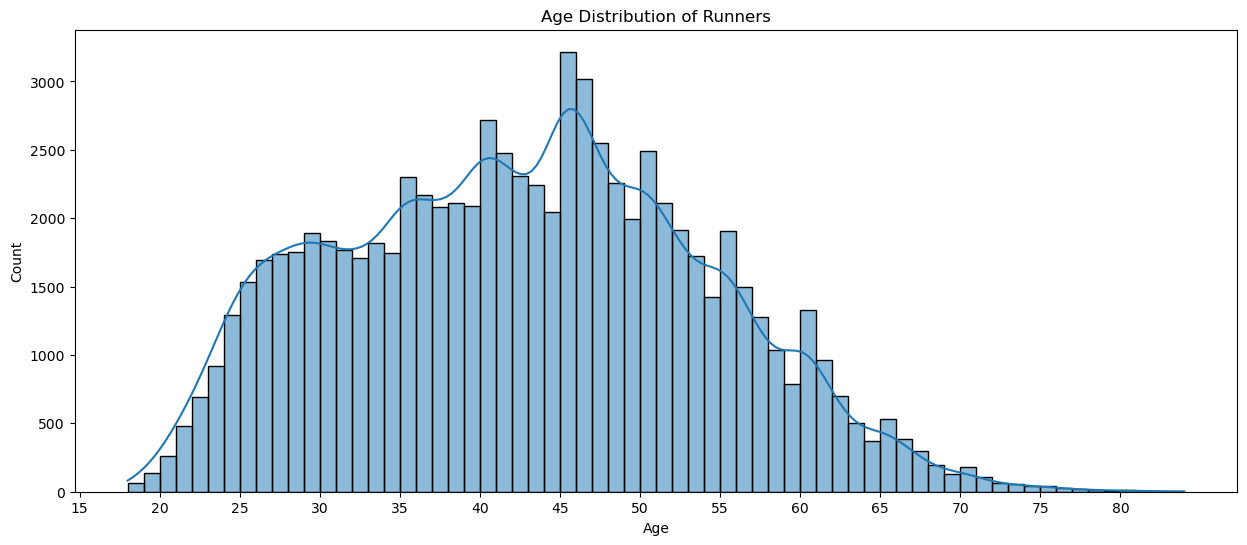

In [34]:
# Get minimum and maximum Age
min_age = df['Age'].min()
max_age = df['Age'].max()

# Calculate the number of bins
age_bins = (max_age - min_age)

# Set up x-ticks
age_ticks = range(min_age // 5 * 5, max_age + 1, 5)

# Make a histplot
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='Age', kde=True, bins=age_bins)
plt.title("Age Distribution of Runners")
plt.xticks(ticks=age_ticks, labels=age_ticks)
plt.show()

In [35]:
min_age

18

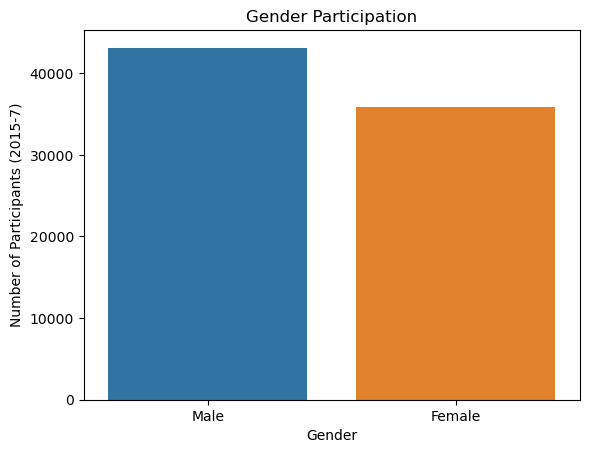

In [36]:
sns.countplot(data=df, x='M/F', hue='M/F', legend=False)
plt.title("Gender Participation")
plt.xticks(ticks=range(0, 2), labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Number of Participants (2015-7)')
plt.show()

Now let's look at some metrics. To start, we'll focus on the distribution of finishing times. As the times are of the timedelta datatype and calculated in nanoseconds, a function will be needed to display the numbers in a sensible way.

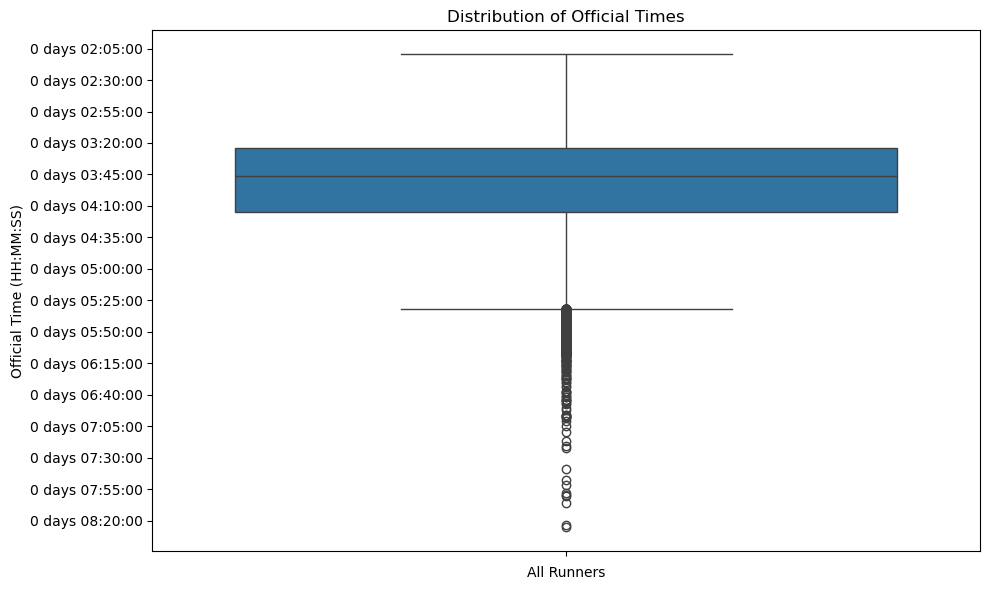

In [37]:
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

# Define the function to format the y-axis as HH:MM:SS
def format_timedelta(x, pos):
    td = pd.to_timedelta(x)
    return str(td).split('.')[0]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Official Time')

# Format the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_timedelta))

# Add more ticks to the y-axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=20))

# Add titles and labels
plt.title("Distribution of Official Times")
plt.ylabel("Official Time (HH:MM:SS)")
plt.xlabel("All Runners")

# Display the plot
plt.tight_layout()
plt.show()

The box plot shows:

– The best time was slightly slower than 2:05:00.
<br>
– The median time was roughly 3:45:00.
<br>
– The upper and lower quartile times were roughly 3:20:00 and 4:10:00 respectively.
<br>
– For the majority of times set, 5:30:00 was the slowest time.
<br>
– There quite a few outliers, particularly up to the 7:00:00 mark.

/var/folders/yz/m7knn1qx1cj11khl5d7jlw_m0000gp/T/ipykernel_33681/1753896773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Percentage Slowdown', data=df, palette='pastel')


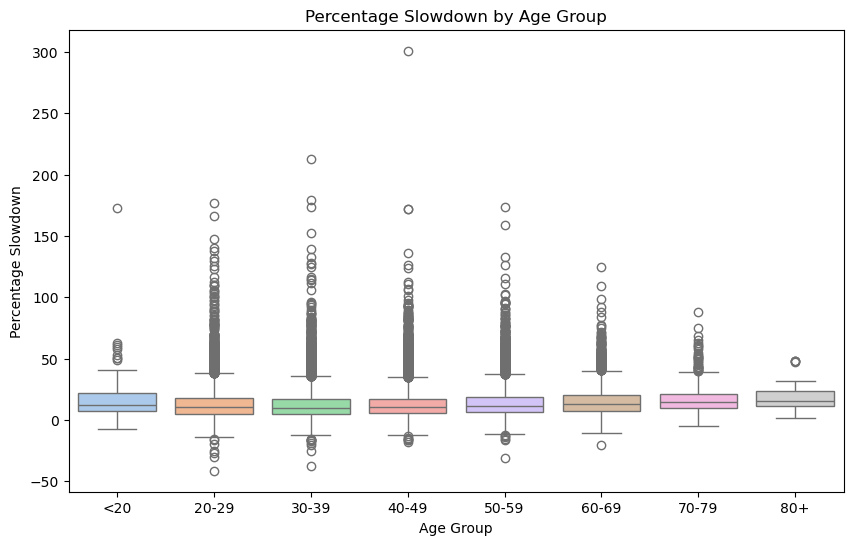

In [38]:
# Calculate percentage slowdown by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Percentage Slowdown', data=df, palette='pastel')
plt.title('Percentage Slowdown by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage Slowdown')
plt.show()

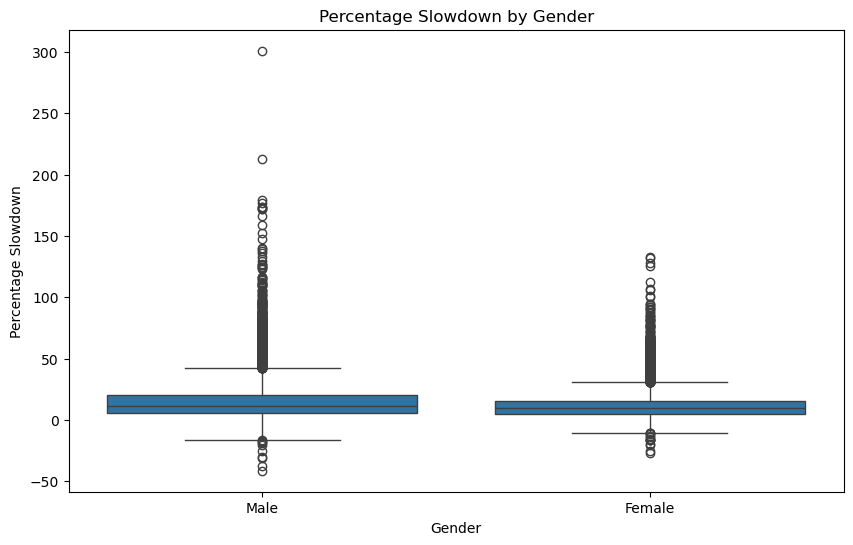

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='M/F', y='Percentage Slowdown', data=df)
plt.title('Percentage Slowdown by Gender')
plt.xlabel('Gender')
plt.xticks(ticks=range(0, 2), labels=['Male', 'Female'])
plt.ylabel('Percentage Slowdown')
plt.show()

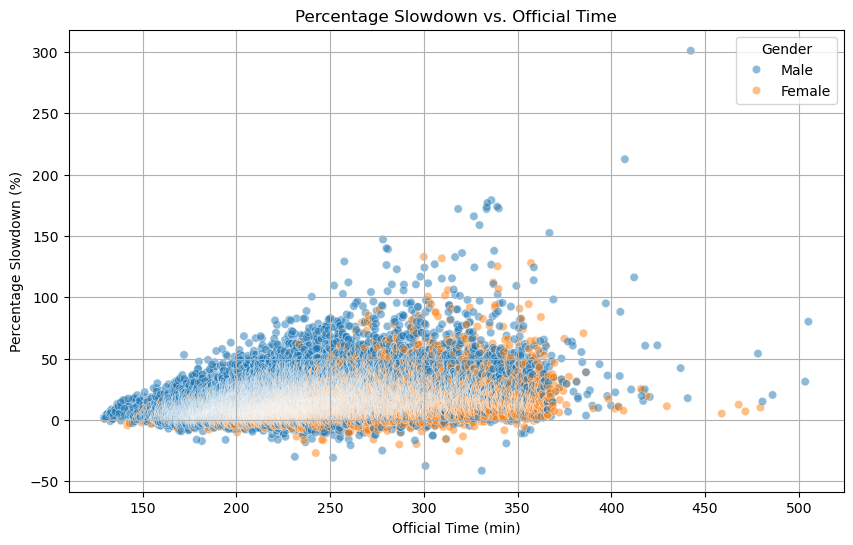

In [40]:
# Convert 'Official Time' to total minutes
time_min = df['Official Time'].dt.total_seconds() / 60

# Prep the 'M/F' column for visualization
gender = df['M/F'].map({0: 'Male', 1: 'Female'})

# Scatter plot for Percentage Slowdown vs. Official Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=time_min, y='Percentage Slowdown', alpha=0.5, hue=gender)
plt.title('Percentage Slowdown vs. Official Time')
plt.xlabel('Official Time (min)')
plt.ylabel('Percentage Slowdown (%)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


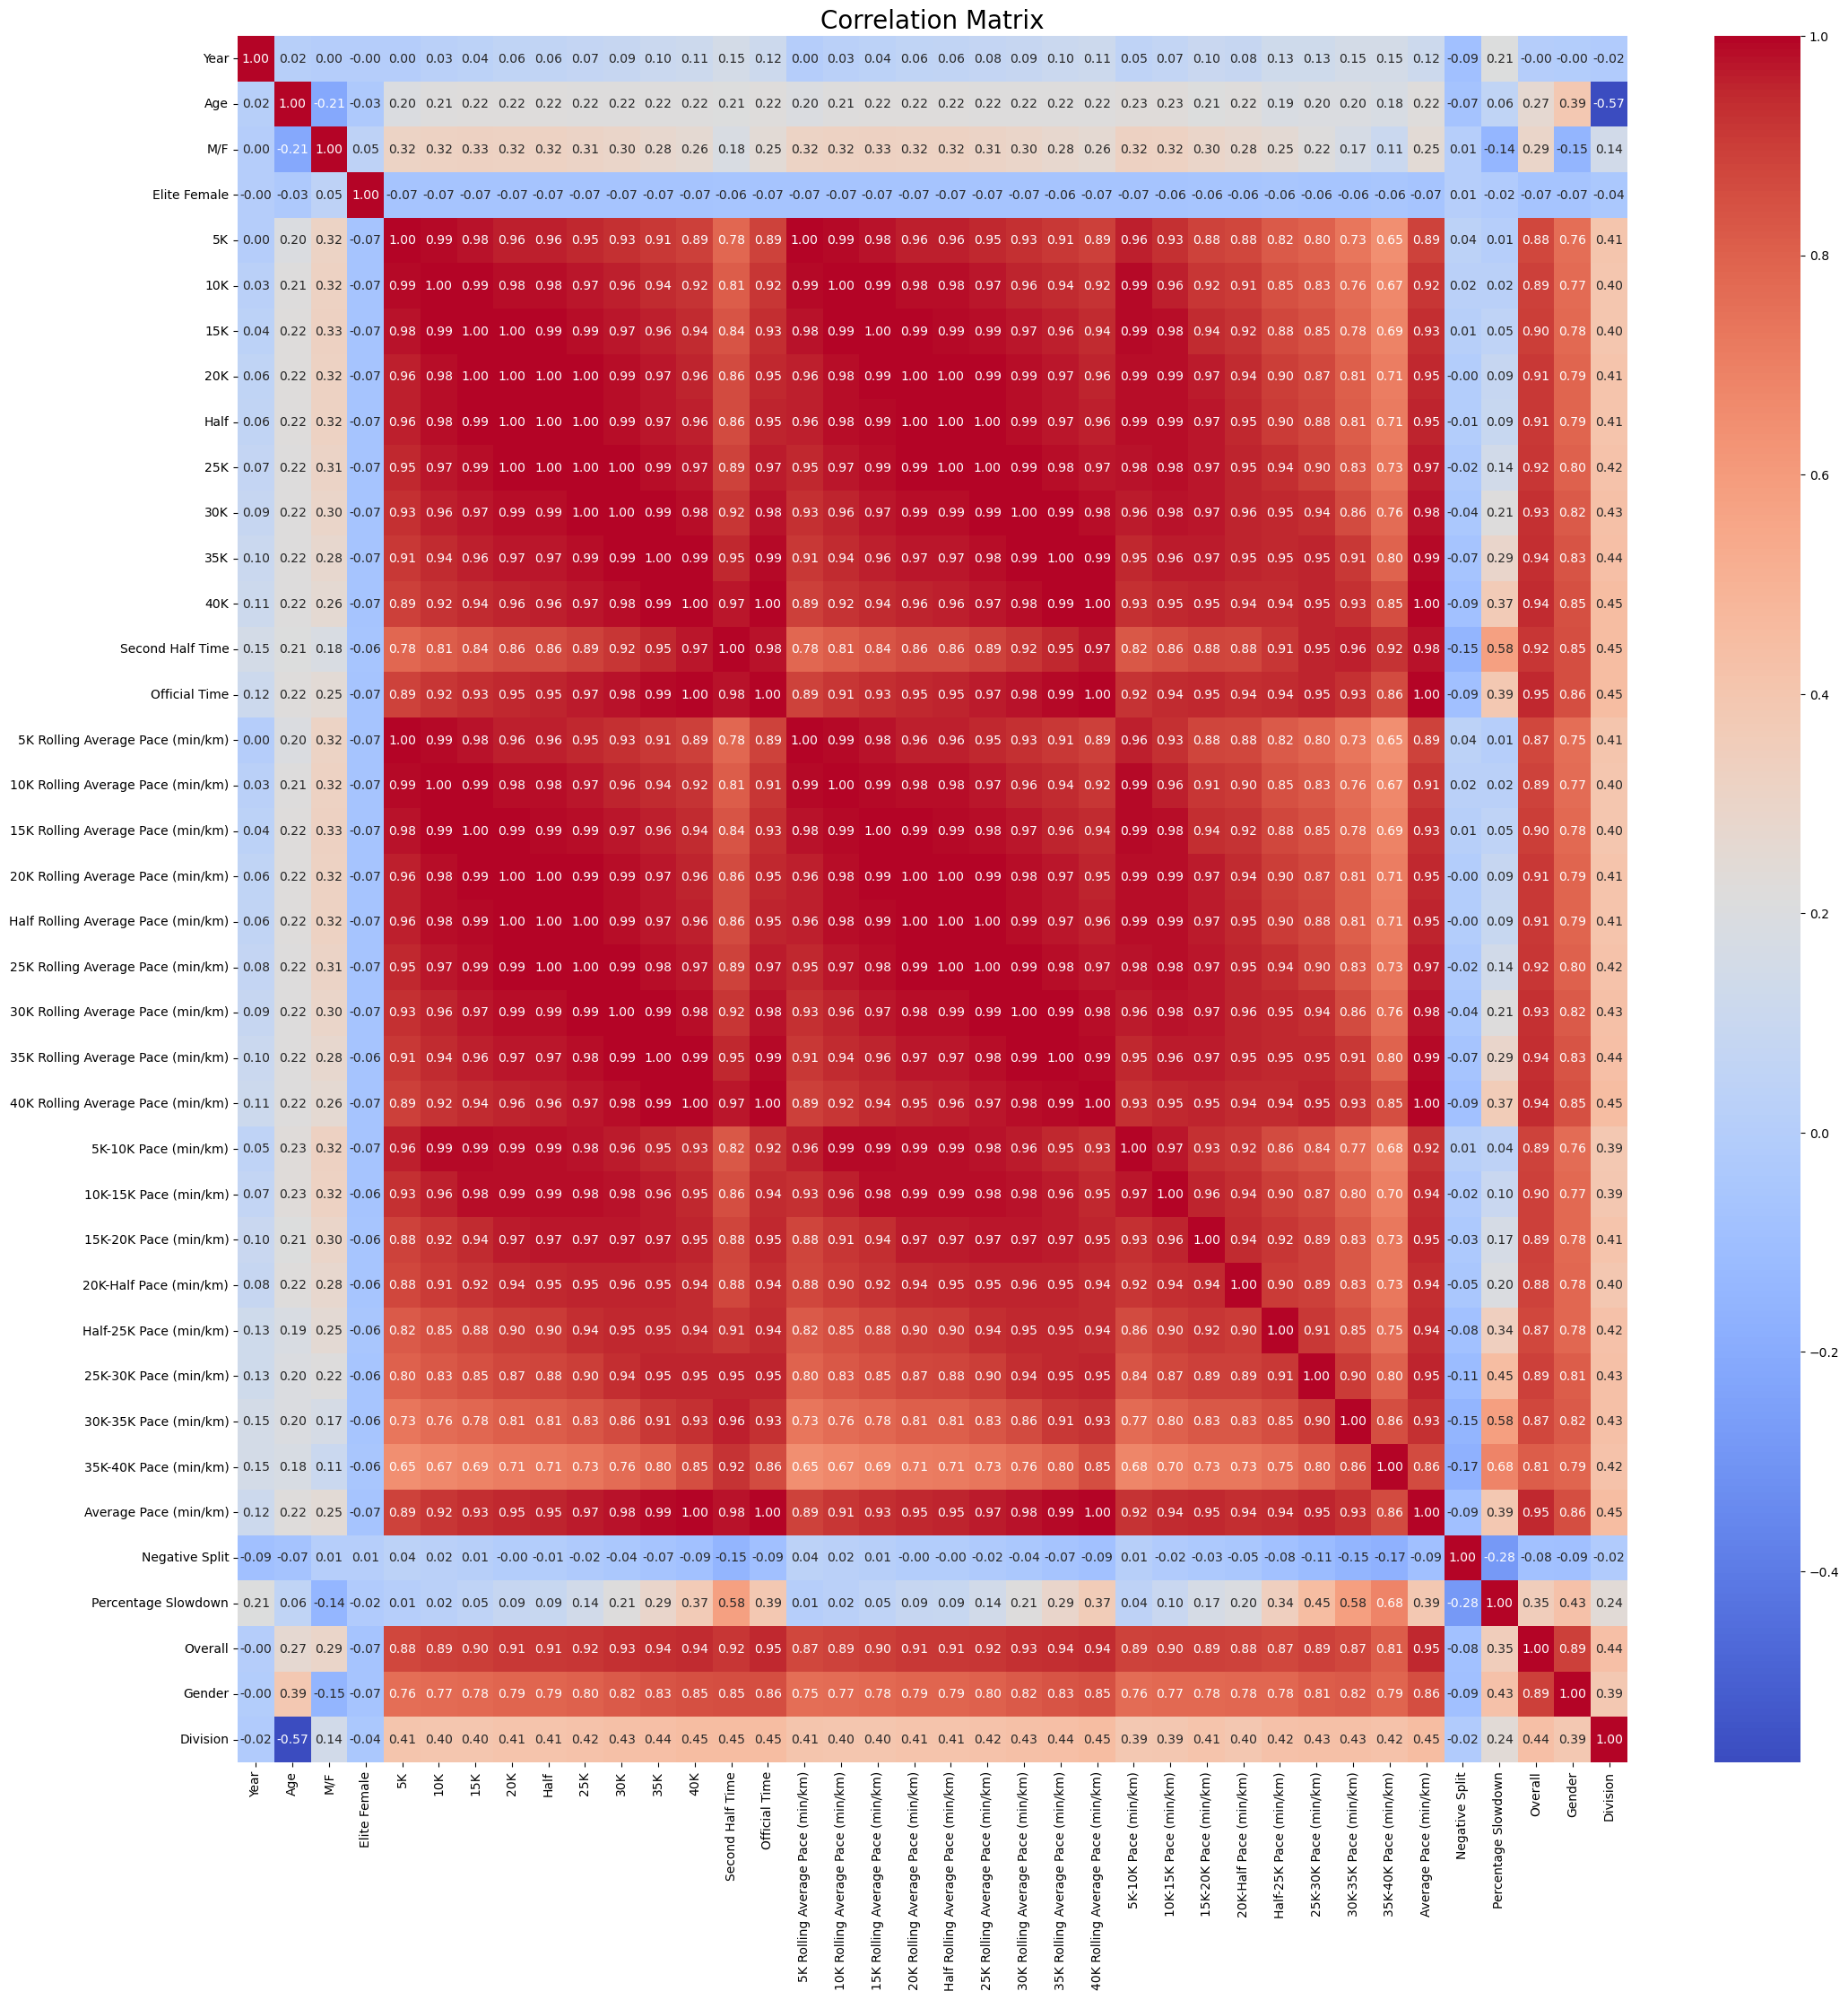

In [41]:
# Get the numeric columns
df_num = df.drop(columns=['Bib', 'Name', 'Age Group', 'City', 'Country'])

corr = df_num.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix", size=20)
plt.show()

There is a high level of multicollinearity here, so much will need to be done to ensure a working model.

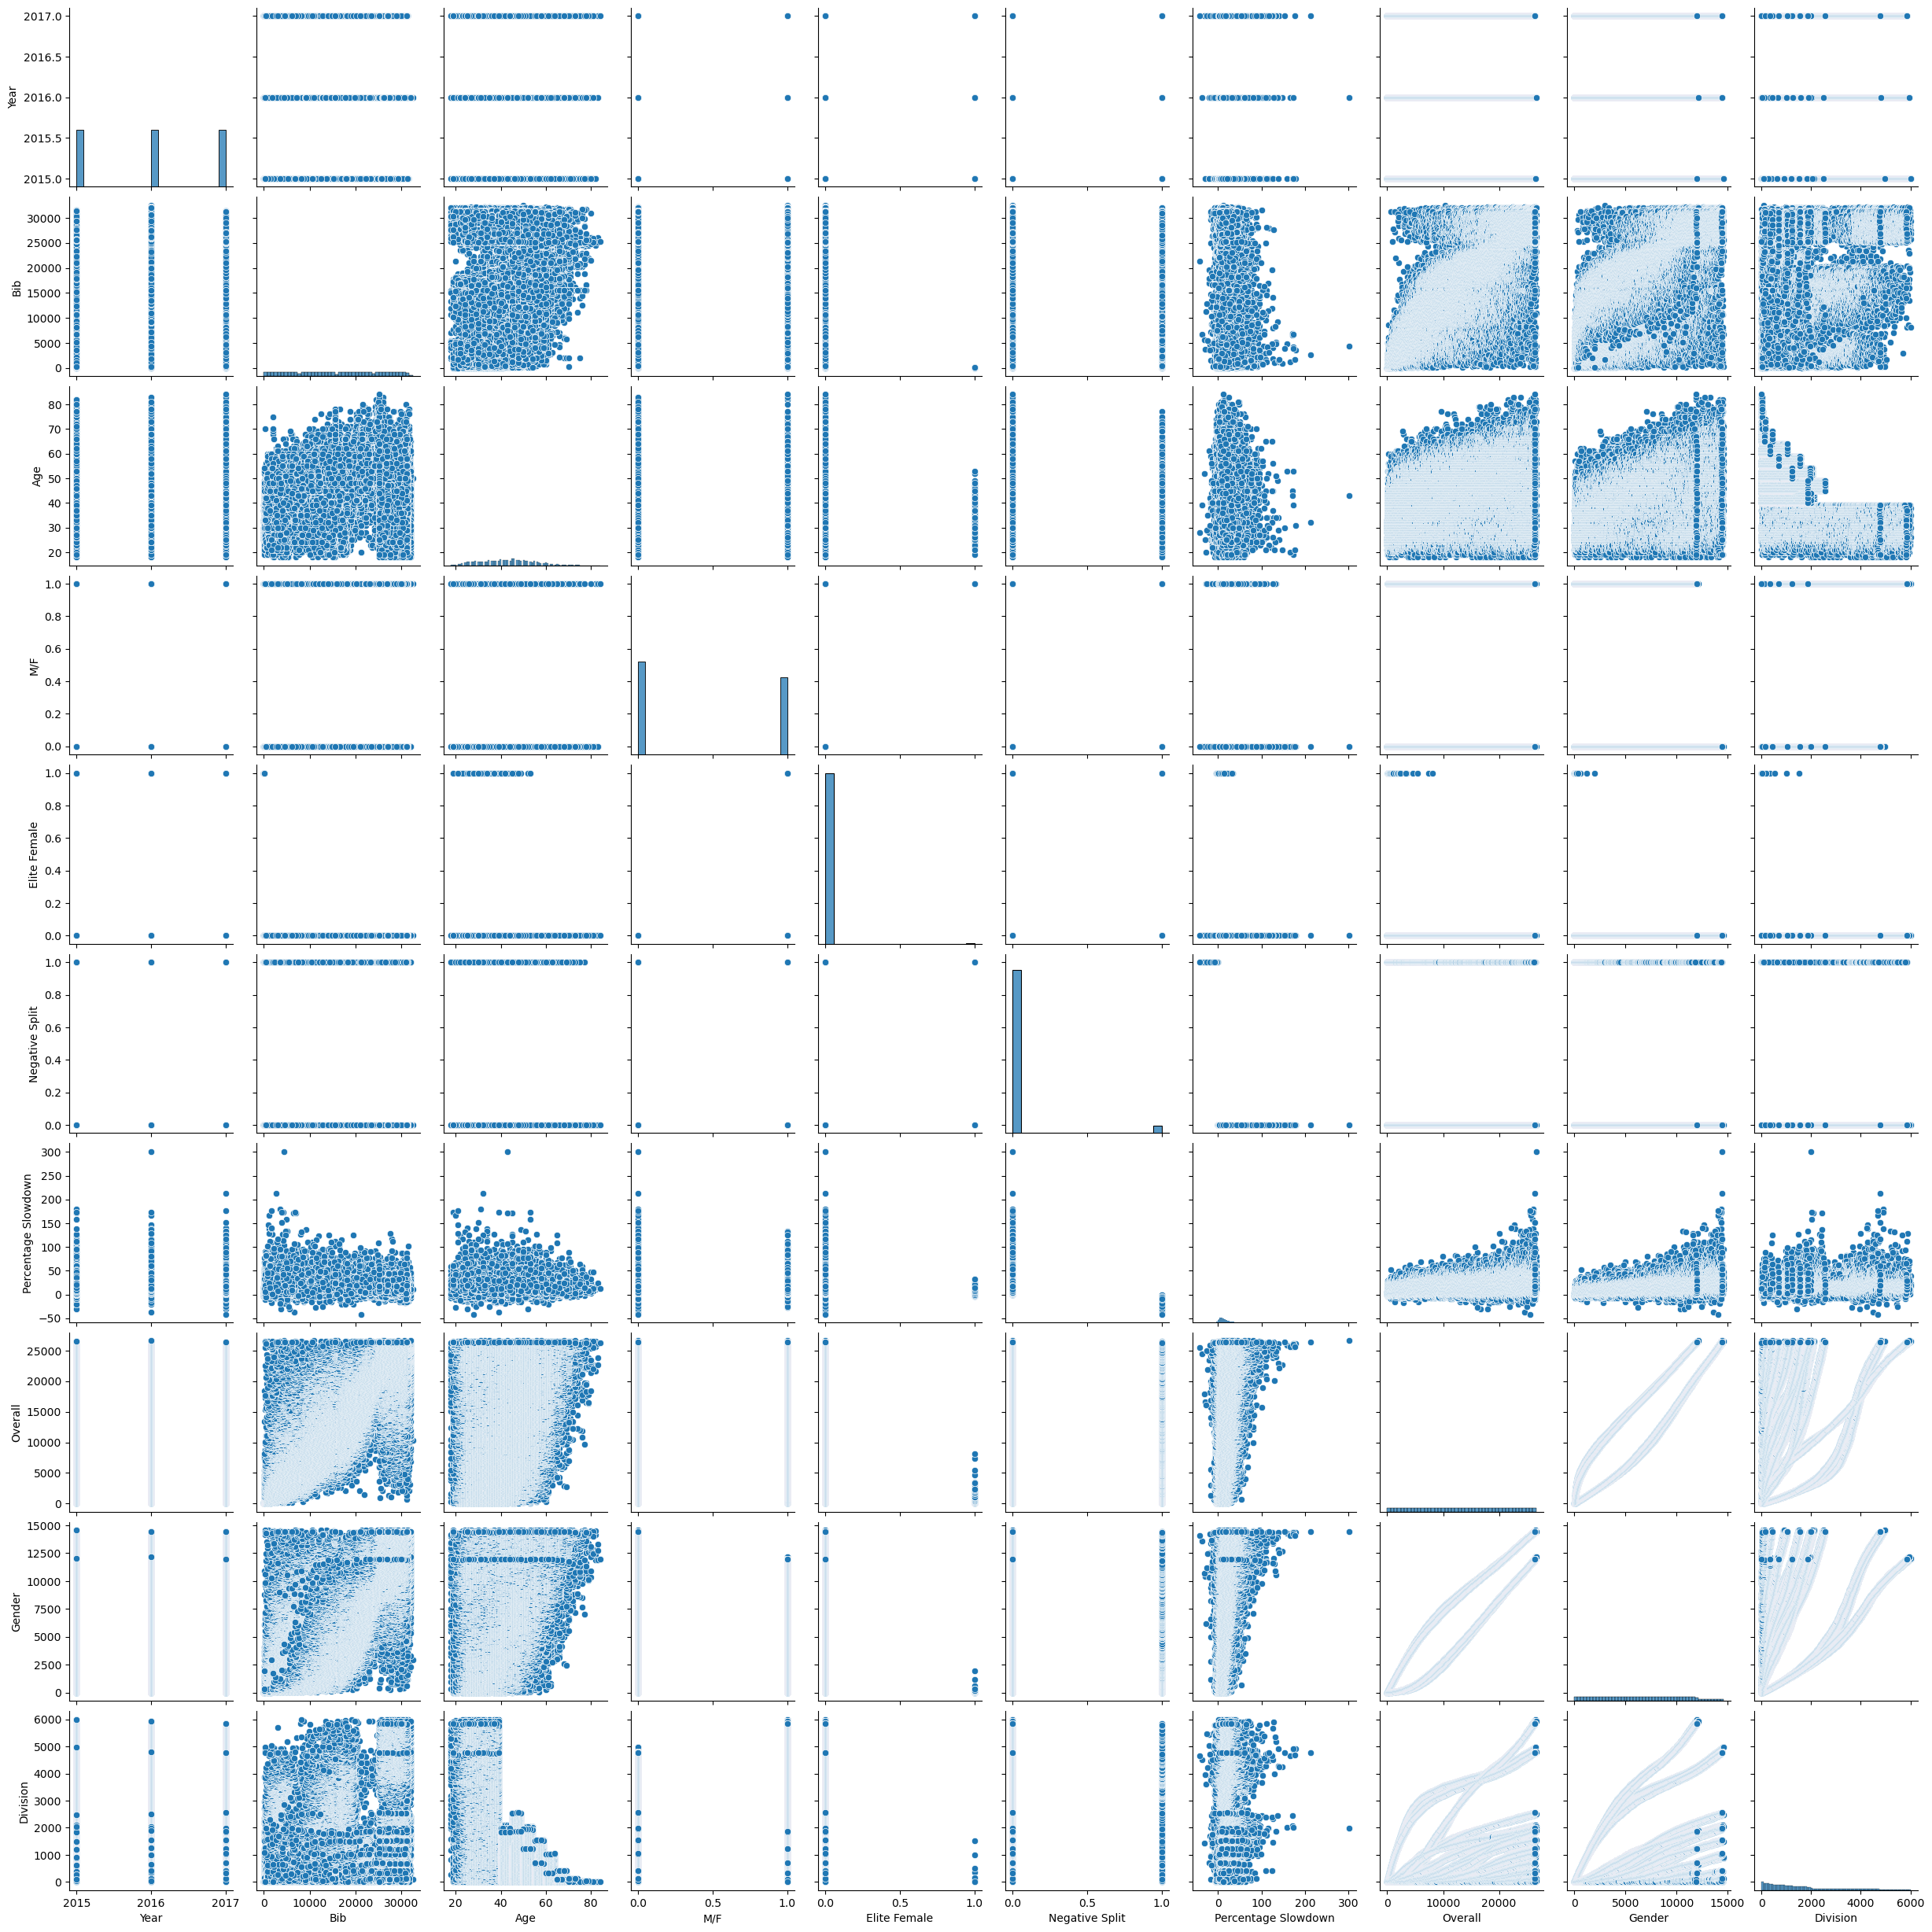

In [42]:
sns.pairplot(df)
plt.show()

## *Preliminary Modelling*

In [43]:
# Define X and y
X = df.drop(columns=['Name', 'Age Group', 'City', 'Country', 'Percentage Slowdown'])
y = df['Percentage Slowdown']


Now I need to scale the data. As the timedelta64 datatype cannot be scaled on its own, I will need to convert these columns to a numeric value (in this case, the number of seconds).

In [44]:
timedelta_cols = X.select_dtypes(include=['timedelta64']).columns

# Convert timedelta columns to total seconds
for col in timedelta_cols:
    X[col] = X[col].dt.total_seconds()

In [45]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (63229, 38)
X_test shape: (15808, 38)
y_train shape: (63229,)
y_test shape: (15808,)


In [47]:
# Instantiate & fit PCA model to the data
my_PCA = PCA()
my_PCA.fit(X_train)

# Transform data 
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)

In [48]:
# Explore variance
print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")
# Explore variance ratios
print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")

Variance captured by PC1:  29.657
Variance captured by PC2:  1.764
Proportion of variance captured by PC1:  0.779
Proportion of variance captured by PC2:  0.046


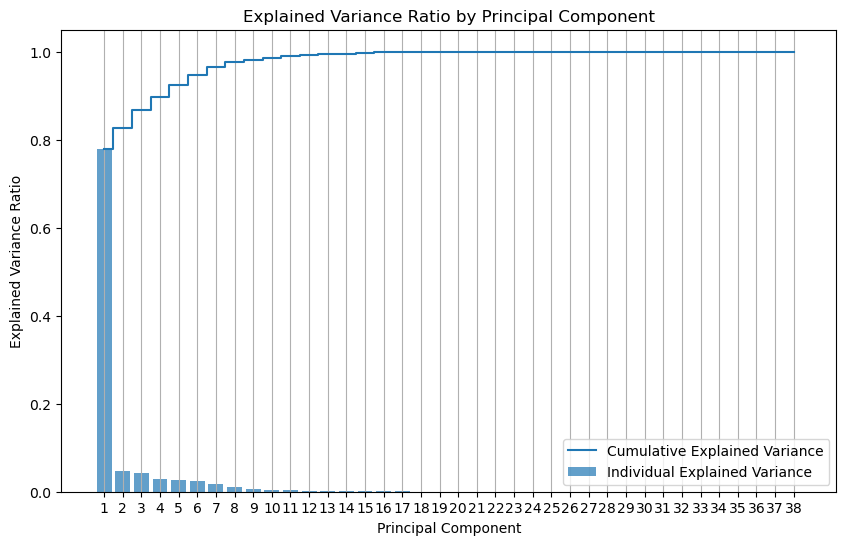

In [49]:
# Cumulative variance explained
cumulative_variance = np.cumsum(my_PCA.explained_variance_ratio_)

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(my_PCA.explained_variance_ratio_) + 1), 
        my_PCA.explained_variance_ratio_, 
        alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), 
         cumulative_variance, where='mid', label='Cumulative Explained Variance')

# Plot formatting
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.legend(loc='best')
plt.xticks(range(1, len(my_PCA.explained_variance_ratio_) + 1))
plt.grid(axis='x')
plt.show()


In [50]:
# Lets say we want to keep 90% of the variance
my_PCA = PCA(n_components = 0.9)
my_PCA.fit(X_train)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)

In [51]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (63229, 38)
PCA Transformed: (63229, 5)


Now let's try fitting a linear regression to the original data.

In [52]:
# Let's use all the default parameters for now
lin_reg = LinearRegression()

# Fitting to original data
lin_reg.fit(X_train,y_train)

# Scoring on original train and test sets
print(f'Train Score: {lin_reg.score(X_train, y_train)}')
print(f'Test Score: {lin_reg.score(X_test, y_test)}')

Train Score: 0.9807777312003942
Test Score: 0.9827546501266495


That's very high! Now let's try a logistic regression to compare. The target needs to be binarized for a logistic regression to work, so let's decide on a threshold of a 20% slowdown.

In [53]:
# Convert continuous target into binary categories
threshold = 20 # Greater than a 20% slowdown
y_train_binary = (y_train >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

In [54]:
# Set up the logistic regression
log_reg = LogisticRegression()

# Fitting to original data
log_reg.fit(X_train,y_train_binary)

# Scoring on original train and test sets
print(f'Train Score: {log_reg.score(X_train, y_train_binary)}')
print(f'Test Score: {log_reg.score(X_test, y_test_binary)}')

Train Score: 0.99514463300068
Test Score: 0.9947494939271255


Let's try adjusting the logistic regression with a solver and a penalty to see if it makes a difference.

In [55]:
# Set up the logistic regression with new parameters
log_reg = LogisticRegression(solver='saga', random_state=42, max_iter=10000, penalty='l1')

# Fitting to original data
log_reg.fit(X_train,y_train_binary)

# Scoring on original train and test sets
print(f'Train Score: {log_reg.score(X_train, y_train_binary)}')
print(f'Test Score: {log_reg.score(X_test, y_test_binary)}')

Train Score: 0.9977700105964036
Test Score: 0.9975961538461539


Slightly higher! Let's adjust the threshold to see if it makes a difference.

In [56]:
# Convert continuous target into binary categories
threshold2 = 10 # Greater than a 10% slowdown
y_train_binary2 = (y_train >= threshold2).astype(int)
y_test_binary2 = (y_test >= threshold2).astype(int)

In [57]:
# Refitting to original data
log_reg.fit(X_train,y_train_binary2)

# Scoring on original train and test sets
print(f'Train Score: {log_reg.score(X_train, y_train_binary2)}')
print(f'Test Score: {log_reg.score(X_test, y_test_binary2)}')

Train Score: 0.9960303025510446
Test Score: 0.994876012145749


Roughly the same. Let's create a confusion matrix to see how the model is doing.

In [58]:
# Get class predictions
y_pred = log_reg.predict(X_test)

# Generate confusion matrix
pcsd_matrix = confusion_matrix(y_test_binary2, y_pred)

# label rows and columns
pcsd_df = pd.DataFrame(
    pcsd_matrix,
    columns=["Predicted >10% Slowdown", "Predicted <10% Slowdown"],
    index=["True >10% Slowdown", "True <10% Slowdown"]
)

display(pcsd_df)

,Predicted >10% Slowdown,Predicted <10% Slowdown
True >10% Slowdown,7532,49
True <10% Slowdown,32,8195


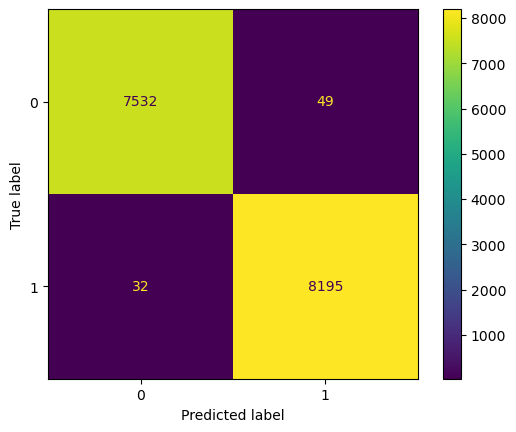

In [59]:
# Slow the confusion matrix results
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test_binary2);

Let's see how the model is doing in terms of accuracy, precision and recall.

In [60]:
# Accuracy
print(f'The accuracy score is {accuracy_score(y_test_binary2, y_pred)}')

# Precision
print(f'The precision score is {precision_score(y_test_binary2, y_pred)}')

# Recall
print(f'The recall score is {recall_score(y_test_binary2, y_pred)}')

The accuracy score is 0.994876012145749
The precision score is 0.9940562833575934
The recall score is 0.9961103682995016


In [61]:
init_report = classification_report(y_test_binary2, y_pred)
print(init_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7581
           1       0.99      1.00      1.00      8227

    accuracy                           0.99     15808
   macro avg       0.99      0.99      0.99     15808
weighted avg       0.99      0.99      0.99     15808



The simple models are achieving very high levels of accuracy, precision and recall. It seems like there's a strong linear relationship in the data, so for now we'll stick with a linear regression. Next, let's try a pipeline to see how that compares. We'll also compare different ways of scaling the data so that we can see if one is better than the others.

In [62]:
# Define the scalers to test
scalers = [
    ('StandardScaler', StandardScaler()),
    ('MinMaxScaler', MinMaxScaler()),
    ('RobustScaler', RobustScaler())
]

# Loop through each scaler, create a pipeline, and evaluate using cross-validation
for scaler_name, scaler in scalers:
    # Define the pipeline
    estimators = [
        ('scaler', scaler),
        ('PCA', PCA(n_components=0.9)),
        ('model', LinearRegression())
    ]
    pipeline = Pipeline(estimators)
    
    # Perform cross-validation
    avg_val_score = np.mean(cross_val_score(pipeline, X_train, y_train, cv=5))
    
    # Print the result
    print(f"Average cross-validation score using {scaler_name}: {avg_val_score:.4f}")


Average cross-validation score using StandardScaler: 0.7709
Average cross-validation score using MinMaxScaler: 0.1920
Average cross-validation score using RobustScaler: 0.5837


Clearly the Standard Scaler is best, so we'll stick with that.

In [63]:
# Set up the pipeline with the number of principal components for 90% of the variance
estimators = [
    ('scaler',StandardScaler()),
    ('PCA', PCA(n_components=0.9)),
    ('model', LinearRegression())
]

mara_pipe = Pipeline(estimators)

And now we'll cross-validate with 5 folds and confirm the average validation score.

In [64]:
avg_val_score = np.mean(cross_val_score(mara_pipe, X_train, y_train, cv=5))
print(f'The cross-validation scores are {(cross_val_score(mara_pipe, X_train, y_train, cv=5))}, and the average score is {avg_val_score}.')

The cross-validation scores are [0.76993317 0.77209436 0.77270895 0.76791808 0.77170994], and the average score is 0.7708728988240056.


Let's check that against the test set to verify the pipeline against unseen data.

In [65]:
# Fit the pipeline
mara_pipe.fit(X_train, y_train)

print(f'Test score: {mara_pipe.score(X_test, y_test)}')

Test score: 0.7760536836507046


Effectively the same, so the pipeline is working well with unseen data.

Now I want to compare different models in the pipeline to see if they can do better than linear regession. We'll try a Random Forest regressor (which can handle noisy data), a Support Vector regressor (which is good at handling outliers) and a simple Decision Tree regressor (which can handle complex relationships).

In [66]:
# Define the models to test
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Regressor', SVR()),
    ('Decision Tree', DecisionTreeRegressor())
]

# Loop through each model, create a pipeline, and evaluate using cross-validation
for model_name, model in models:
    # Define the pipeline
    estimators = [
        ('scaler', StandardScaler()),
        ('PCA', PCA(n_components=0.9)),
        ('model', model)
    ]
    pipeline = Pipeline(estimators)
    
    # Perform cross-validation
    avg_val_score = np.mean(cross_val_score(pipeline, X_train, y_train, cv=5))
    
    # Print the result
    print(f"Average cross-validation score using {model_name}: {avg_val_score:.4f}")


Average cross-validation score using Linear Regression: 0.7709
Average cross-validation score using Random Forest: 0.9570
Average cross-validation score using Support Vector Regressor: 0.9036
Average cross-validation score using Decision Tree: 0.9182


This shows that the best model of the ones tested is the Random Forest, so that shall be the baseline model for now. This suggests that there are non-linear relationships within the data that the Linear Regression is not capturing.

Finally, let's dig into which features are most important to the preliminary model.

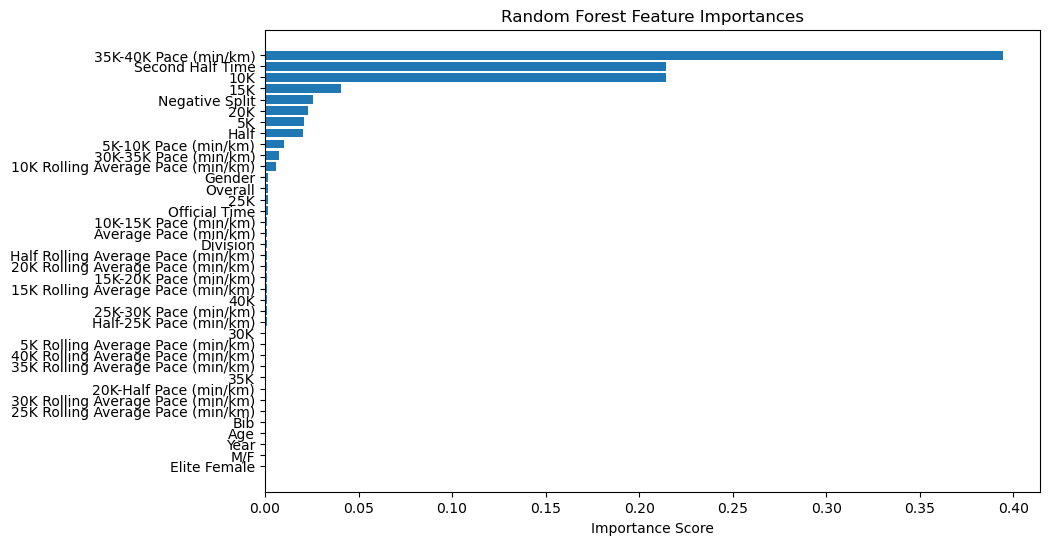

In [73]:
# Fit the model (using training data)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = df.drop(columns=['Name', 'Age Group', 'City', 'Country', 'Percentage Slowdown']).columns

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_labels = np.array(feature_names)[sorted_indices]

# Plot the feature importances with column names
plt.figure(figsize=(10, 6))
plt.barh(sorted_labels, sorted_importances)
plt.gca().invert_yaxis()  # Most important at the top
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importances')
plt.show()


This is an interesting breakdown of which features are most important to the preliminary model. When trying to predict the percentage slowdown, it looks like `35K-40K Pace (min/km)` is most predictive, followed by `Second Half Time`. Both of these make sense given the fact that they apply to the latter portion of the race; what is more surprising is that the time at the `10K` mark also seems to be predictive. That will be explored in the next stage of the project.

The next steps will be to further explore the importance of different features, tune different hyperparameters, and to see if there are other models (*e.g.* XGBoost) that may perform even better than a Random Forest.